In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
falseDF=pd.read_csv('falseDF.csv')
falseDF

,id,Age,Annual_Premium,Vintage,Response,Response_y,Response_y.1,Response_y.2,Response_y.3,Response_y.4,Response_y.5,Response_y.6
0,0,0.247059,0.120521,0.625418,0.0,0.139688,0.177725,0.240530,0.123132,0.228493,0.121274,0.192496
1,2,0.294118,0.070428,0.849498,0.0,0.103297,0.041404,0.004198,0.123132,0.000638,0.085700,0.026222
2,3,0.411765,0.004869,0.254181,0.0,0.103297,0.177725,0.240530,0.123132,0.228493,0.102073,0.204927
3,4,0.423529,0.059150,0.983278,0.0,0.103297,0.177725,0.004198,0.123132,0.000638,0.067435,0.026222
4,5,0.364706,0.052114,0.658863,0.0,0.103297,0.041404,0.004198,0.123132,0.000638,0.083005,0.026222
...,...,...,...,...,...,...,...,...,...,...,...,...
10089734,11504791,0.364706,0.004869,0.682274,0.0,0.103297,0.041404,0.004198,0.123132,0.000638,0.084166,0.026222
10089735,11504792,0.400000,0.055490,0.672241,0.0,0.139688,0.177725,0.004198,0.123132,0.000638,0.191811,0.249854
10089736,11504793,0.564706,0.050747,0.729097,0.0,0.139688,0.177725,0.240530,0.123132,0.228493,0.068065,0.207763
10089737,11504795,0.341176,0.004869,0.632107,0.0,0.103297,0.041404,0.004198,0.123132,0.000638,0.084166,0.026222


In [3]:
trueDF=pd.read_csv('trueDF.csv')
trueDF

,id,Age,Annual_Premium,Vintage,Response,Response_y,Response_y.1,Response_y.2,Response_y.3,Response_y.4,Response_y.5,Response_y.6
0,1,0.505882,0.109061,0.963211,1.0,0.139688,0.299049,0.24053,0.123132,0.228493,0.191811,0.207763
1,7,0.552941,0.075271,0.876254,1.0,0.103297,0.177725,0.24053,0.123132,0.228493,0.087718,0.207763
2,28,0.470588,0.004869,0.682274,1.0,0.139688,0.177725,0.24053,0.123132,0.228493,0.121274,0.260495
3,36,0.588235,0.054146,0.913043,1.0,0.103297,0.177725,0.24053,0.123132,0.228493,0.096163,0.192496
4,44,0.470588,0.067048,0.956522,1.0,0.139688,0.177725,0.24053,0.123132,0.228493,0.087718,0.192496
...,...,...,...,...,...,...,...,...,...,...,...,...
1415054,11504732,0.529412,0.060241,0.301003,1.0,0.139688,0.177725,0.24053,0.123132,0.228493,0.191811,0.192496
1415055,11504755,0.529412,0.069721,0.545151,1.0,0.139688,0.177725,0.24053,0.123132,0.228493,0.078031,0.111863
1415056,11504784,0.294118,0.089306,0.123746,1.0,0.139688,0.041404,0.24053,0.123132,0.228493,0.191811,0.056011
1415057,11504794,0.305882,0.054630,0.384615,1.0,0.103297,0.041404,0.24053,0.123132,0.228493,0.078031,0.026222


In [4]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
device

'cuda'

In [5]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, df:pd.DataFrame):
        self.id = df['id'].values
        df= df.drop(columns=['id'])

        self.response = df['Response'].values
        df= df.drop(columns=['Response'])
            
        self.data = df.astype(float).values
        
        pass

    def __len__(self):
        return len(self.id)

    def __getitem__(self, idx):
        x=self.data[idx]
        x=torch.FloatTensor(x)
        x=x.to(device)

        id = self.id[idx]

        y=self.response[idx]
        if y ==0:
            y=[1,0]
        else:
            y=[0,1]
        y=torch.FloatTensor(y)
        y=y.to(device)

        return id, x, y

trueSet= MyDataset(trueDF)
falseSet= MyDataset(falseDF)
falseSet[0]

(0,
 tensor([0.2471, 0.1205, 0.6254, 0.1397, 0.1777, 0.2405, 0.1231, 0.2285, 0.1213,
         0.1925], device='cuda:0'),
 tensor([1., 0.], device='cuda:0'))

In [6]:
trueSplit = torch.utils.data.random_split(trueSet,(0.7,0.3))
falseSplit = torch.utils.data.random_split(falseSet,(0.7,0.3))
# trueSplit[0][0]
falseSplit[0][0]

(5446975,
 tensor([0.2471, 0.0652, 0.3880, 0.1033, 0.0414, 0.0042, 0.1231, 0.0006, 0.0877,
         0.0207], device='cuda:0'),
 tensor([1., 0.], device='cuda:0'))

In [7]:
trainSet = torch.utils.data.ConcatDataset((trueSplit[0],falseSplit[0]))
valSet = torch.utils.data.ConcatDataset((trueSplit[1],falseSplit[1]))
trainSet[1]

(6016929,
 tensor([0.4353, 0.0647, 0.8161, 0.1033, 0.1777, 0.2405, 0.1231, 0.2285, 0.1141,
         0.2605], device='cuda:0'),
 tensor([0., 1.], device='cuda:0'))

In [8]:
trueCNT = len(trueSplit[0])
falseCNT = len(falseSplit[0])
weight = trueCNT/(trueCNT+falseCNT)
weight

trueList = [1-weight for _ in range(trueCNT)]
len(trueList)

falseList = [weight for _ in range(falseCNT)]
len(falseList)

weightList = trueList+falseList
len(weightList)

8053360

In [9]:
trueCNT = len(trueSplit[1])
falseCNT = len(falseSplit[1])
weight = trueCNT/(trueCNT+falseCNT)
weight

trueList = [1-weight for _ in range(trueCNT)]
len(trueList)

falseList = [weight for _ in range(falseCNT)]
len(falseList)

val_weightList = trueList+falseList
len(val_weightList)

3451438

In [10]:
trainLoader=torch.utils.data.DataLoader(trainSet,batch_size=1024,sampler=torch.utils.data.WeightedRandomSampler(weightList,1024*7))
valLoader=torch.utils.data.DataLoader(valSet,batch_size=1024,sampler=torch.utils.data.WeightedRandomSampler(val_weightList,1024*3))
trainLoader

In [11]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.convStack = torch.nn.Sequential(
            torch.nn.Linear(10, 10),
            torch.nn.ReLU(),
            torch.nn.Linear(10, 2)
        )

    def forward(self, x):
        logits = self.convStack(x)
        return logits

model = Net().to(device)
model

Net(
  (convStack): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=2, bias=True)
  )
)

[1] cnt: 0 - val loss: 2.050066828727722 - train loss: 4.857176780700684
[1] cnt: 0 - val loss: 2.008076846599579 - train loss: 4.75164932012558
[1] cnt: 0 - val loss: 1.9135916829109192 - train loss: 4.611256957054138
[1] cnt: 0 - val loss: 1.804650068283081 - train loss: 4.363171219825745
[1] cnt: 1 - val loss: 1.95870840549469 - train loss: 4.31225711107254
[1] cnt: 0 - val loss: 1.7466722130775452 - train loss: 4.268217861652374
[1] cnt: 0 - val loss: 1.6671690940856934 - train loss: 4.000403106212616
[1] cnt: 0 - val loss: 1.547006368637085 - train loss: 3.8507941365242004
[1] cnt: 0 - val loss: 1.5008490979671478 - train loss: 3.820725381374359
[1] cnt: 0 - val loss: 1.4926855564117432 - train loss: 3.5483668744564056
[1] cnt: 1 - val loss: 1.5741925835609436 - train loss: 3.551066964864731
[1] cnt: 0 - val loss: 1.3968198895454407 - train loss: 3.3043016493320465
[1] cnt: 1 - val loss: 1.4019467532634735 - train loss: 3.460582196712494
[1] cnt: 0 - val loss: 1.3674704134464264 -

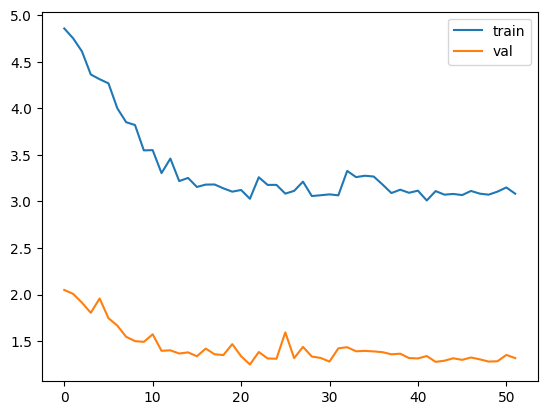

In [12]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(model.parameters(),lr=1)
trainHistory=[]
valHistory=[]
lrScheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.01)

bestLoss = float('inf')
for phase in range(3):
    cnt = 0
    bestModel = model
    
    while(cnt<10):
        model.train()
        trainLoss=0
        for  _, x, y in trainLoader:
            # Compute prediction error
            pred = model(x)
            loss = loss_fn(pred, y)
            trainLoss +=loss.item()
    
            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    
        model.eval()
        valLoss=0
        with torch.no_grad():
            for _, x,y in valLoader:
                pred = model(x)
                loss = loss_fn(pred, y)
                valLoss+=loss.item()
    
        trainHistory.append(trainLoss)
    
        valHistory.append(valLoss)
    
        if bestLoss < valLoss:
            cnt +=1
        else:
            bestLoss = valLoss
            bestModel = model
            cnt =0 
    
        print(f'{lrScheduler.get_last_lr()} cnt: {cnt} - val loss: {valLoss} - train loss: {trainLoss}')
    
    model = bestModel
    lrScheduler.step()

torch.save(model, 'model.pt')

plt.plot(trainHistory,label='train')
plt.plot(valHistory, label='val')
plt.legend() 

In [13]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for _, x, y  in valLoader:
        pred = model(x)

        for idx, i in enumerate(pred):
            if i.argmax()== y[idx].argmax():
                correct +=1 
            total+=1
correct / total

0.7913411458333334